In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\kylem\AppData\Local\Temp\ipykernel_25296\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [21]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [22]:
# Save references to each table
station_list = Base.classes.station
measurement_weather = Base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
most_recent_data = session.query(measurement_weather.date)\
                            .order_by(measurement_weather.date.desc())\
                            .first()

most_recent_data

('2017-08-23',)

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
aug_last_year = dt.date(2016, 8, 22) 
print(aug_last_year)
# Perform a query to retrieve the data and precipitation scores
prev_percp = session.query(measurement_weather.date, measurement_weather.prcp).\
                    filter(measurement_weather.date >= aug_last_year).\
                    order_by(measurement_weather.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prev_year_df = pd.DataFrame(prev_percp)
prev_year_df = prev_year_df.set_index('date')

# Sort the dataframe by date
prev_year_df_date_sort = prev_year_df.sort_values(by='date',ascending = True)

2016-08-22


<Figure size 640x480 with 0 Axes>

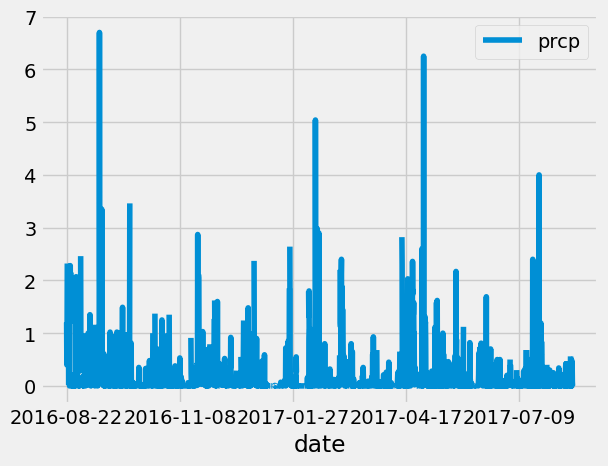

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(); prev_year_df_date_sort.plot(); plt.legend(loc='best')

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
prev_year_df.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number of stations in the dataset
tot_station_number = session.query(station_list.station).count()
print(tot_station_number)

9


In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active =session.query(measurement_weather.station, func.count(measurement_weather.station))\
                    .group_by(measurement_weather.station)\
                    .order_by(func.count(measurement_weather.station).desc())\
                    .all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_temp_query = session.query(func.min(measurement_weather.tobs),
                                     func.max(measurement_weather.tobs),
                                     func.avg(measurement_weather.tobs))\
                                     .filter(measurement_weather.station == most_active[0][0])\
                                     .all()
active_temp_query

[(54.0, 85.0, 71.66378066378067)]

<Figure size 640x480 with 0 Axes>

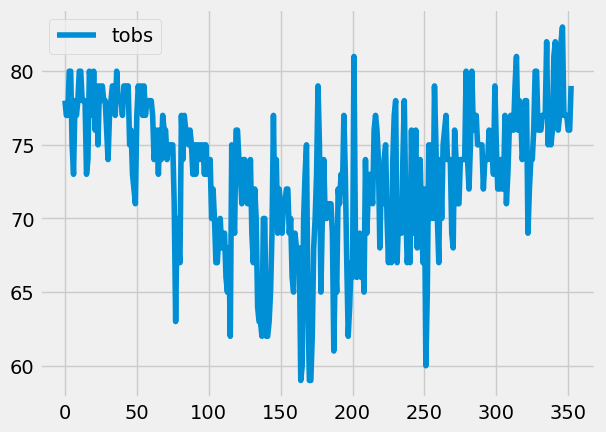

In [66]:
# Using the most active station id   aug_last_year
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_active = session.query(measurement_weather.date, measurement_weather.tobs)\
                        .filter(measurement_weather.station == most_active[0][0])\
                        .filter(measurement_weather.date >= aug_last_year)\
                        .all()
lya_df = pd.DataFrame(last_year_active)

plt.figure(); lya_df.plot(); plt.legend(loc='best')

# Close Session

In [67]:
# Close Session
session.close()